# Applied Exercise 1

**In Chapter 4, we used logistic regression to predict the probability of `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using te validation set approach. Do not forget to set a random seed before beginning your analysis.**

In [1]:
library(ISLR)

In [2]:
head(Default)

default,student,balance,income
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559


In [3]:
set.seed(312)

## Part 1
**Fit a logistic regression model that uses `income` and `balance` to predict `default`.**

For this part, we use the entire data set to fit a logisic regression model to predict `default` by using `income` and `balance`.

In [4]:
glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


## Part 2
**Using the validation set approach, estimate the test error of this model. In order to do this, youmust perform the following steps:**

1. **Split the sample into a training set and a validation set.**
2. **Fit a multiple logistic regression model using only the training observations.**
3. **Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the `default` category if the posterior probability is greater than 0.5.**
4. **Compute the validation set error, which is the fraction of observations in the validation set that are misclassified.**

I will use a 75-25 split when dividing my data into a training set and a validation set.

In [5]:
train = sample(dim(Default)[1], 0.75*dim(Default)[1])

In [6]:
glm.fit = glm(default ~ income + balance, data = Default, subset = train, family = "binomial")
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.preds = rep("No", dim(Default)[1])
glm.preds[glm.probs > 0.5] = "Yes"
mean(glm.preds != Default[-train, "default"])

[1] 0.0284

For this train-test split, we had a validation set error of 0.0284, or 2.84% of the observations in the validation set that are misclassified.

## Part 3
**Repeat the process in Part 2 three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.**

In [7]:
train = sample(dim(Default)[1], 0.75*dim(Default)[1])
glm.fit = glm(default ~ income + balance, data = Default, subset = train, family = "binomial")
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.preds = rep("No", dim(Default)[1])
glm.preds[glm.probs > 0.5] = "Yes"
mean(glm.preds != Default[-train, "default"])

[1] 0.0268

In [8]:
train = sample(dim(Default)[1], 0.75*dim(Default)[1])
glm.fit = glm(default ~ income + balance, data = Default, subset = train, family = "binomial")
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.preds = rep("No", dim(Default)[1])
glm.preds[glm.probs > 0.5] = "Yes"
mean(glm.preds != Default[-train, "default"])

[1] 0.0256

In [9]:
train = sample(dim(Default)[1], 0.75*dim(Default)[1])
glm.fit = glm(default ~ income + balance, data = Default, subset = train, family = "binomial")
glm.probs = predict(glm.fit, Default[-train, ], type = "response")
glm.preds = rep("No", dim(Default)[1])
glm.preds[glm.probs > 0.5] = "Yes"
mean(glm.preds != Default[-train, "default"])

[1] 0.0252

In [10]:
1 - mean(Default[-train, "default"] == "No")

[1] 0.0356

Using three different 75-25 splits of the data, our validation set error remained fairly consistent. The average error between this part and Part 2 was 0.0265, and errors were all within about 13% of each other. We also note that these test errors are all about 30% less than the test error one would have using the naive strategy of just saying that nobody will default.

## Part 4
**Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.**

In [11]:
with.student = rep(0, 50)
without.student = rep(0, 50)
for (i in 1:50){
    train = sample(dim(Default)[1], 0.75*dim(Default)[1])
    with.student.fit = glm(default ~ ., data = Default, subset = train, family = "binomial")
    without.student.fit = glm(default ~ income + balance, data = Default, subset = train, family = "binomial")
    with.student.probs = predict(with.student.fit, Default[-train, ], type = "response")
    without.student.probs = predict(without.student.fit, Default[-train, ], type = "response")
    with.student.preds = rep("No", dim(Default)[1])
    without.student.preds = rep("No", dim(Default)[1])
    with.student.preds[with.student.probs > 0.5] = "Yes"
    without.student.preds[without.student.probs > 0.5] = "Yes"
    with.student[i] = mean(with.student.preds != Default[-train, "default"])
    without.student[i] = mean(without.student.preds != Default[-train, "default"])
}
difference = with.student - without.student
errors = data.frame(with.student, without.student, difference)
mean(errors$difference)

[1] 0.000296

Looping through 50 train-test splits and comparing the error rates between the logistic regression model predicting `default` using `income`, `balance`, and `student` and the logistic regression model predicting `default` using just `income` and `balance` for each split, we see that, on average, including a dummy variable for `student` does not lead to a reduction in the test error rate. In fact, on average it resulted in a very slight increase in the test error rate.

# Applied Exercise 2

**We continue to consider the use of a logistic regression model to predict the probability of `default` using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `glm()` function. Do not forget to set a random seed before beginning your analysis.**

In [12]:
library(boot)

In [13]:
set.seed(312)

## Part 1
**Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.**

In [14]:
glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
summary(glm.fit)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


Using the `summary()` and `glm()` functions, the estimated standard error for the estimated coefficient of `income` is $4.985 \times 10^{-6}$, while the estimated standard error for the estimated coefficient of `balance` is $2.274 \times 10^{-4}$.

## Part 2

**Write a function, `boot.fn()` that takes as input the `Default` data as well as an index of the observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression model.**

In [15]:
boot.fn = function(data, index){
    coefs = coef(glm(default ~ income + balance, data = data, subset = index, 
                     family = "binomial"))[c("income", "balance")]
    return(coefs)
}

## Part 3
**Use the `boot()` fuction together with your `boot.fn()` function to estimate the standard errors of the logistic regression coefficients for `income` and `balance`.**

In [16]:
boot(Default, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
        original       bias     std. error
t1* 2.080898e-05 1.947180e-08 4.668888e-06
t2* 5.647103e-03 1.362778e-05 2.323593e-04

Using the bootstrap, the estimated standard errors of the logistic regression coefficients for `income` and `balance` are $4.669 \times 10^{-6}$ and $2.324 \times 10^{-4}$, respectively.

## Part 4

**Comment on the estimated standard errors obtained using the `glm()` function and using your bootstrap function.**

The standard errors obtained by the bootstrap appear to be a quite close to those obtained using the statistical formulas underlying the `glm()` function. This suggests that the data satisfies the underlying assumptions of a logistic regression model: the responses $Y_i$ are independent random variables coming from Bernoulli distributions with probabilities $P_i$, and the log-odds corresponding to $P_i$ is a linear combination of the predictors.

# Applied Exercise 3

**In Sections 5.3.2 and 5.3.3, we saw that the `cv.glm()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the `glm()` and `predict.glm()` functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given by the following formula.**

\begin{equation}
    \text{CV}_{(n)} = \frac{1}{n} \sum_{i = 1}^n I(y_i \neq \hat{y}_i)
\end{equation}

In [17]:
head(Weekly)

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


## Part 1
**Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.**

In [18]:
glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly, family = "binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


## Part 2
**Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` *using all but the first observation*.**

In [19]:
glm.fit.loo = glm(Direction ~ Lag1 + Lag2, data = Weekly, family = "binomial", subset = c(-1))
summary(glm.fit.loo)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = "binomial", data = Weekly, 
    subset = c(-1))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


## Part 3
**Use the model from Part 2 to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P(\text{Direction} = \text{"Up"} | \text{Lag1, Lag2}) > 0.5$. Was this observation correctly classified?**

In [20]:
predict(glm.fit.loo, Weekly[1, ])

1 
0.287534

In [21]:
Weekly[1, ]

Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.27,Down


Using the model from Part 2, we predict that the first observation will go down, since the predicted posterior probability from the model is 0.287. This observation was correctly classified.

## Part 4
**Write a for loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:**

1. **Fit a logistic regression model using all but the $i$th observation to predict `Direction` using `Lag1` and `Lag2`.**
2. **Compute the posterior probability of the market moving up for the $i$th observation.**
3. **Use the posterior probability for the $i$th observation in order to predict whether or not the market moves up.**
4. **Determine whether or not an error was made in predicting the direction for the $i$th observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.**

In [22]:
n = dim(Weekly)[1]
errors = rep(0, n)
for (i in 1:n){
    glm.fit.loo = glm(Direction ~ Lag1 + Lag2, data = Weekly, family = "binomial", subset = c(-i))
    pred = "Down"
    if (predict(glm.fit.loo, Weekly[i, ], type = "response") > 0.5){
        pred = "Up"
    }
    if (pred != Weekly[i, "Direction"]){
        errors[i] = 1
    }
}

## Part 5
**Take the average of the $n$ numbers obtained in Step 4 of Part 4 in order to obtain the LOOCV estimate for the test error. Comment on the results.**

In [23]:
mean(errors)

[1] 0.4499541

In [24]:
glm.fit = glm(Direction ~ Lag1 + Lag2, data = Weekly, family = "binomial")
cost = function(r, pi) mean(abs(r-pi)> 0.5)
cv.err = cv.glm(Weekly, glm.fit, cost = cost)
cv.err$delta[1]

[1] 0.4499541

In [25]:
mean(Weekly["Direction"] != "Up")

[1] 0.4444444

The LOOCV estimate for the test error is approximately 0.45, which matches the value we get if we use `cv.glm()` to compute the error. This tells us that the logistic regression model using `Lag1` and `Lag2` to predict `Direction` by using a probability threshold of 0.5 performed a bit better than randomly guessing. However, it is important to note that we get essentially the same error rate with a naive strategy of predicting that the market will go up every week. 

Note that if we wish to use `cv.glm()` to compute the LOOCV test error, by default it computes the errors for the posterior probabilities, since on its own logistic regression is ***not*** a classification method. Performing classification using logistic regression like we have done in this chapter involves choosing a probability threshold for assigning class predictions, based on the posterior probabilities predicted by the logistic regresion model. In order to have `cv.glm()` compute the LOOCV test error for binary classification with a classification threshold of 0.5, as we have done manually with a for loop in Part 4, we need to pass an appropriate cost function to the `cost` argument. Further details can be found in the documentation associated with `?cv.glm`.

# Applied Exercise 4

**We will now perform cross-validation on a simulated data set.**

## Part 1
**Generate a simulated data set as follows:**

```
> set.seed(1)
> x = rnorm(100)
> y = x - 2*x^2 + rnorm(100)
```

**In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.**

In [26]:
set.seed(1)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)

In this data set, $n = 100$ and $p = 1$. In other words, there is one predictor and 100 observations. In equation form, the model used to generate the data is $Y = x - 2X^2 + \epsilon$.

## Part 2
**Create a scatterplot of $X$ against $Y$. Comment on what you find.**

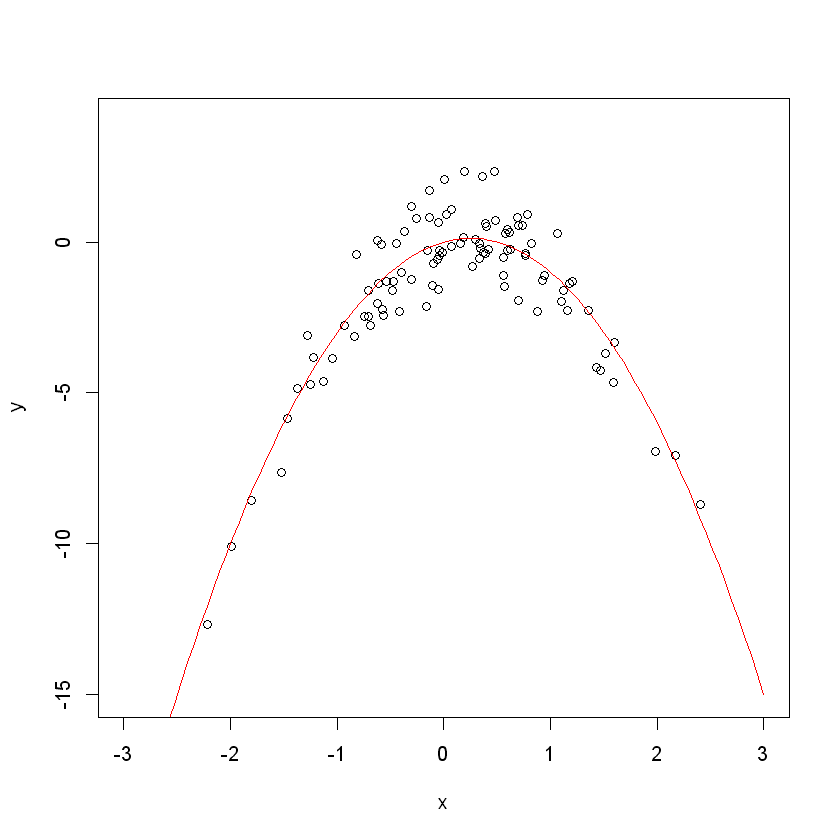

In [27]:
plot(x, y, xlim = range(-3:3), ylim = range(-15:4))
par(new = TRUE)
curve(x - 2*x^2, from = -3, to = 3, xlim = range(-3:3), ylim = range(-15:4), xlab = "", ylab = "", col = "red")

While there is some noise, especially around the vertex of parabola for the model underlying the data, we can see that for the most part the scatterplot is fairly parabolic.

## Part 3
**Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:**

1. $Y = \beta_0 + \beta_1X + \epsilon$
2. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$
3. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$
4. $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$

**Note that you may find it helpful to use the `data.frame()` function to create a single dataset containing both $X$ and $Y$.**

In [28]:
set.seed(312)

In [29]:
xy.data = data.frame("pred" = x, "resp" = y)

In [30]:
deg1.fit = glm(resp ~ pred, data = xy.data)
deg1.err = cv.glm(xy.data, deg1.fit)
deg1.err$delta[1]

[1] 7.288162

The LOOCV error for the linear model $Y = \beta_0 + \beta_1X + \epsilon$ is 7.288.

In [31]:
deg2.fit = glm(resp ~ poly(pred, 2), data = xy.data)
deg2.err = cv.glm(xy.data, deg2.fit)
deg2.err$delta[1]

[1] 0.9374236

The LOOCV error for the quadratic model $Y = \beta_0 + \beta_1X + \beta_2X^2 + \epsilon$ is 0.937.

In [32]:
deg3.fit = glm(resp ~ poly(pred, 3), data = xy.data)
deg3.err = cv.glm(xy.data, deg3.fit)
deg3.err$delta[1]

[1] 0.9566218

The LOOCV error for the cubic model $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$ is 0.957.

In [33]:
deg4.fit = glm(resp ~ poly(pred, 4), data = xy.data)
deg4.err = cv.glm(xy.data, deg4.fit)
deg4.err$delta[1]

[1] 0.9539049

The LOOCV error for the quartic model $Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \beta_4X^4 + \epsilon$ is 0.954.

## Part 4
**Repeat Part 3 using another random seed, and report your results. Are your results the same as what you got in Part 3? Why or why not?**

In [34]:
set.seed(42)

In [35]:
deg1.fit = glm(resp ~ pred, data = xy.data)
deg1.err = cv.glm(xy.data, deg1.fit)
deg1.err$delta[1]

[1] 7.288162

In [36]:
deg2.fit = glm(resp ~ poly(pred, 2), data = xy.data)
deg2.err = cv.glm(xy.data, deg2.fit)
deg2.err$delta[1]

[1] 0.9374236

In [37]:
deg3.fit = glm(resp ~ poly(pred, 3), data = xy.data)
deg3.err = cv.glm(xy.data, deg3.fit)
deg3.err$delta[1]

[1] 0.9566218

In [38]:
deg4.fit = glm(resp ~ poly(pred, 4), data = xy.data)
deg4.err = cv.glm(xy.data, deg4.fit)
deg4.err$delta[1]

[1] 0.9539049

The LOOCV errors for each model are the same as those computed in Part 3, even with a different seed. This makes sense since LOOCV does not involve any randomness. It always involves fitting a model $\mathcal{M}_i$ using all of the observations except for observation $X_i$, computing the error between the predicted value $\hat{Y}_i$ obtained from the model $\mathcal{M}_i$ and the actual value $Y_i$, and then taking the average of the errors over all $n$ models for the $n$ observations in the data set.

## Part 5
**Which of the models in Part 3 had the smallest LOOCV error? Is this what you expected? Explain your answer.**

The quadratic model in Part 3 had the smallest LOOCV error, though the cubic and quartic models also had close LOOCV error values, especially compared to the much larger LOOCV error value for the linear model. This is what I expected, since the true model used to produce the simulated data was a quadratic one.

## Part 6
**Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in Part 3 using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?**

Note that I used the `poly()` function to produce orthogonal polynomials for each of the higher-order polynomial fits, as orthogonal polynomials allows for more clear evaluation of the statistical significance of the coefficient estimates for the higher order terms.

In [39]:
summary(deg1.fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.625427,0.2619366,-6.205420,1.309300e-08
pred,0.692497,0.2909418,2.380191,1.923846e-02


In the linear model, the coefficient estimate is statistically significant at the 5% level. This result agrees with the high LOOCV error obtained in Part 3, which suggested that a purely linear fit was not appropriate.

In [40]:
summary(deg2.fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.550023,0.09580323,-16.179231,2.656229e-29
"poly(pred, 2)1",6.188826,0.95803228,6.459934,4.184810e-09
"poly(pred, 2)2",-23.948305,0.95803228,-24.997388,4.584330e-44


In the quadratic model, both coefficient estimates are highly statistically significant. In particular, the p-values for the coefficients of both the quadratic and linear terms are essentially zero. This agrees with the large drop in LOOCV error going from the linear fit to the quadratic fit, which suggested that a quadratic fit was more appropriate than a purely linear one.

In [41]:
summary(deg3.fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.5500226,0.09626318,-16.101926,4.995066e-29
"poly(pred, 3)1",6.1888256,0.96263178,6.429068,4.971565e-09
"poly(pred, 3)2",-23.9483049,0.96263178,-24.877950,1.216703e-43
"poly(pred, 3)3",0.2641057,0.96263178,0.274358,7.843990e-01


In the cubic model, the linear and quadratic terms are both highly statistically significant, but the cubic term is not. In particular, the p-value for the cubic term is 0.784, which is quite high. This agrees with the fact that while the LOOCV error for the cubic fit is still much lower than the LOOCV error for the linear fit, it is slightly higher than this LOOCV error for the quadratic fit, which suggests that a quadratic fit is likely to be more appropriate than a cubic fit.

In [42]:
summary(deg4.fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.5500226,0.09590514,-16.1620379,5.169227e-29
"poly(pred, 4)1",6.1888256,0.95905143,6.4530695,4.590732e-09
"poly(pred, 4)2",-23.9483049,0.95905143,-24.9708243,1.593826e-43
"poly(pred, 4)3",0.2641057,0.95905143,0.2753822,7.836207e-01
"poly(pred, 4)4",1.2570950,0.95905143,1.3107691,1.930956e-01


In the quartic model, the linear and quadratic terms are both highly statistically significant, but the cubic and quartic terms are not. In particular, the p-values for the cubic and quartic terms are 0.784 and 0.193, respectively, which are quite high. This agrees with the fact that while the LOOCV error for the quartic fit is still much lower than the LOOCV error for the linear fit, it is slightly higher than this LOOCV error for the quadratic fit, which suggests that a quadratic fit is likely to be more appropriate than a quartic fit.

# Applied Exercise 5
**Weill we now consider the `Boston` housing data set.**

To have consistency with my results for when I do these exercises in Python, I'll use the corrected Boston housing data set instead of the one that is part of the `MASS` library.

In [43]:
boston = read.csv("boston_corrected.csv", header = TRUE)
boston = boston[, 7:20]
head(boston)

CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
24.0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
21.6,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
34.7,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
33.4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
36.2,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
28.7,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


## Part 1
**Based on this data set, provide an estimate for the population mean of `CMEDV`. Call this estimate $\hat{\mu}$.**

In [49]:
mean(boston$CMEDV)

[1] 22.52885

The estimated population mean of `CMEDV` is $\hat{\mu} = 22.529$. In other words, the average median home value for this sample is \$22,529.

## Part 2
**Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.**

***Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.***

In [50]:
sample.sd = sd(boston$CMEDV)
sample.sem = sample.sd / sqrt(dim(boston)[1])
sample.sem

[1] 0.4081975

Using the [usual formula for estimating the standard error](https://en.wikipedia.org/wiki/Standard_error), we get a value of 0.408 as our estimate for the standard error of $\hat{\mu}$. Since `CMEDV` was measured in units of 1,000 USD, this estimate of the standard error translates to \$408. We will further interpret what this estimate of standard error means in Part 4.

## Part 3
**Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from Part 2?**

In [55]:
set.seed(312)

In [56]:
boot.fn = function(data, index){
    return(mean(data[index, "CMEDV"]))
}

In [57]:
boot(boston, boot.fn, 10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = boston, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.52885 0.001582826   0.4060708

Using the bootstrap, we have an estimate of 0.406 for the standard error of $\hat{\mu}$. This is very close to the estimate obtained in Part 3.

## Part 4
**Based on your bootstrap estimate from Part 3, provide a 95% confidence interval for the mean of `CMEDV`. Compare it to the results obtained using `t.test(Boston$CMEDV)`.**

***Hint: You can approximate a 95% confidence interval using the formula $[ \hat{\mu} - 2\text{SE}(\hat{\mu}), \hat{\mu} + 2\text{SE}(\hat{\mu}) ]$.***

In [59]:
t.test(boston$CMEDV)


	One Sample t-test

data:  boston$CMEDV
t = 55.191, df = 505, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 21.72688 23.33083
sample estimates:
mean of x 
 22.52885 


Based on our bootstrap estimate from Part 3, a 95% confidence interval for the mean of `CMEDV` is approximately $[22.529 - 2 \times 0.406, \, 22.529 + 2 \times 0.406]$, or $[21.717, \, 23.341]$. This is slightly wider than the confidence interval computed using `t.test()`, since we rounded our critical $t$-value up to 2, when for our data set with 506 observations the actual critical $t$-value is approximately 1.960. The meaning of a 95% confidence interval is that if we repeatedly sampled from the population and used the sample means and estimated standard errors to compute many confidence intervals, approximately 95% of those confidence intervals will contain the actual population mean. In other words, there is a 95% chance that this confidence interval contains the actual population mean of `CMEDV`.

## Part 5
**Based on this dataset, provide an estimate, $\hat{\mu}_{\text{med}}$, for the median value of `CMEDV` in the population.**

In [61]:
median(boston$CMEDV)

[1] 21.2

The estimated population median of `CMEDV` is $\hat{\mu}_{\text{med}} = 21.2$. In other words, the median of median home values for this sample is \$21,200.

## Part 6
**We would now like to estimate the standard error of $\hat{\mu}_{\text{med}}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.**

In [62]:
set.seed(312)

In [63]:
boot.fn = function(data, index){
    return(median(data[index, "CMEDV"]))
}

In [64]:
boot(boston, boot.fn, 10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = boston, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
    original   bias    std. error
t1*     21.2 -0.01289   0.3760705

Using the bootstrap, we have an estimate of 0.376 for the standard error of $\hat{\mu}_{\text{med}}$. Based on this bootstrap estimate, a 95% confidence interval for the median of `CMEDV` is approximately $[21.2 - 2 \times 0.376, \, 21.2 + 2 \times 0.376]$, or $[20.448, \, 21.952]$. There is a 95% chance that this confidence interval contains the actual population median of `CMEDV`.

## Part 7
**Based on this data set, provide an estimate for the tenth percentile of `CMEDV` in Boston suburbs. Call this quantity $\hat{\mu}_{0.1}$. To compute this estimate, you can use the `quantile()` function.**

In [67]:
quantile(boston$CMEDV, c(0.1))

10% 
12.9

The estimated population tenth percentile of `CMEDV` is $\hat{\mu}_{0.1} = 12.9$. In other words, the tenth percentile of median home values for this sample is \$12,900, or only 10% of observations in this sample have a `CMEDV` value of 12.9 or less.

## Part 8
**Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.**

In [68]:
set.seed(312)

In [69]:
boot.fn = function(data, index){
    return(quantile(data[index, "CMEDV"], 0.1))
}

In [70]:
boot(boston, boot.fn, 10000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = boston, statistic = boot.fn, R = 10000)


Bootstrap Statistics :
    original   bias    std. error
t1*     12.9 -0.07158   0.4876654

Using the bootstrap, we have an estimate of 0.488 for the standard error of $\hat{\mu}_{0.1}$. Based on this bootstrap estimate, a 95% confidence interval for the tenth percentile of `CMEDV` is approximately $[12.9 - 2 \times 0.488, \, 12.9 + 2 \times 0.488]$, or $[11.924, \, 13.876]$. There is a 95% chance that this confidence interval contains the actual population tenth percentile of `CMEDV`.